In [38]:
import pandas as pd
from my_fun import summary_result
from my_fun import plot_result_mergecv

scatter_data_ridge = pd.read_csv("result/allsubjects/scatter_data_ridge.csv", sep = ",", header = 0, )
scatter_data_svr = pd.read_csv("result/allsubjects/scatter_data_svr.csv", sep = ",", header = 0, )
scatter_data_gpr = pd.read_csv("result/allsubjects/scatter_data_gpr.csv", sep = ",", header = 0, )
scatter_data_dnn = pd.read_csv("result/allsubjects/scatter_data_dnn.csv", sep = ",", header = 0, )

result_table_ridge = pd.read_csv("result/allsubjects/result_table_ridge.csv", sep = ",", header = [0,1], index_col = 0)
result_table_ridge, temp = summary_result(result_table_ridge)
result_table_svr = pd.read_csv("result/allsubjects/result_table_svr.csv", sep = ",", header = [0,1], index_col = 0)
result_table_svr, temp = summary_result(result_table_svr)
result_table_gpr = pd.read_csv("result/allsubjects/result_table_gpr.csv", sep = ",", header = [0,1], index_col = 0)
result_table_gpr, temp = summary_result(result_table_gpr)
result_table_dnn = pd.read_csv("result/allsubjects/result_table_dnn.csv", sep = ",", header = [0,1], index_col = 0)
result_table_dnn, temp = summary_result(result_table_dnn)

summary_result:
            Pearson r            R square                 MAE            \
                 mean       std      mean       std      mean       std   
GMV          0.778699  0.038760  0.607724  0.060091  1.709623  0.145834   
ReHo         0.708595  0.054694  0.504799  0.077074  1.942002  0.201624   
ALFF         0.758508  0.041386  0.576876  0.061800  1.797892  0.156593   
FA           0.668042  0.056366  0.449139  0.074217  2.041622  0.166573   
MD           0.732532  0.045182  0.538440  0.065102  1.828865  0.110947   
GMV&DTI      0.847416  0.030028  0.718925  0.049915  1.424371  0.098932   
GMV&rsfMRI   0.835094  0.034676  0.698465  0.057812  1.471083  0.136086   
DTI&rsfMRI   0.824293  0.030722  0.680309  0.049654  1.531533  0.090117   
Multi-modal  0.850486  0.028020  0.724032  0.046998  1.398148  0.094135   

                 rmse            
                 mean       std  
GMV          2.126999  0.189425  
ReHo         2.381085  0.193903  
ALFF         2.210462 

In [39]:
def combine_scatter_data(data_list, feature = 'Multi-modal'):
    out_data_list = []
    for i in range(len(data_list)):
        plot_data = data_list[i]
        plot_data = plot_data.set_index(['feature']).sort_index()
        plot_data = plot_data.loc[feature,:]
        plot_data['age gap'] = -plot_data['chronological age']+plot_data['brain age']
        out_data_list.append(plot_data)
        
    out_data = pd.concat(out_data_list, keys = ['Ridge', 'SVR', 'GPR', 'DNN'], sort = True)
    return(out_data)

def combine_result_table(data_list, feature = 'Multi-modal'):
    out_data_list = []
    for i in range(len(data_list)):
        plot_data = data_list[i]
        plot_data = plot_data.loc[feature,:]
        out_data_list.append(plot_data)
        
    out_data = pd.concat(out_data_list, keys = ['Ridge', 'SVR', 'GPR', 'DNN'], sort = True)
    return(out_data)

In [40]:
scatter_data_list = [scatter_data_ridge, scatter_data_svr, scatter_data_gpr, scatter_data_dnn]
scatter_data = combine_scatter_data(scatter_data_list)
# scatter_data['CV'].value_counts()

In [41]:
result_table_list = [result_table_ridge, result_table_svr, result_table_gpr, result_table_dnn]
result_table = combine_result_table(result_table_list)

In [42]:
# plot regression results:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

def plot_brain_age(result_table_summary, plot_data):
    
    
    index_name = plot_data.index.unique(level = 0)
    plot_data = plot_data.sort_index()
    result_table_summary = result_table_summary.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)
    
    g = sns.lmplot(x='chronological age', y='brain age', hue = 'CV', col = 'Method', \
                       data = plot_data2, fit_reg=False, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = False, col_wrap=2)
    g.axes[0].set_xlim(6.5, 22.5)
    
    for i_index in index_name:
        # chronological age vs brain age:
        label1 = "$R^2$ = %.3f, MAE = %.3f" % \
        (result_table_summary.loc[(i_index, 'R square')]['mean'], \
         result_table_summary.loc[(i_index, 'MAE')]['mean'])

        
        sns.regplot(x='chronological age', y='brain age', \
                    data = plot_data.loc[i_index], scatter=False, ax=g.axes[sub_plot], order = 2)

        #text_y = plot_data['brain age'].max()
        g.axes[sub_plot].text(8, 20, label1, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

        
        


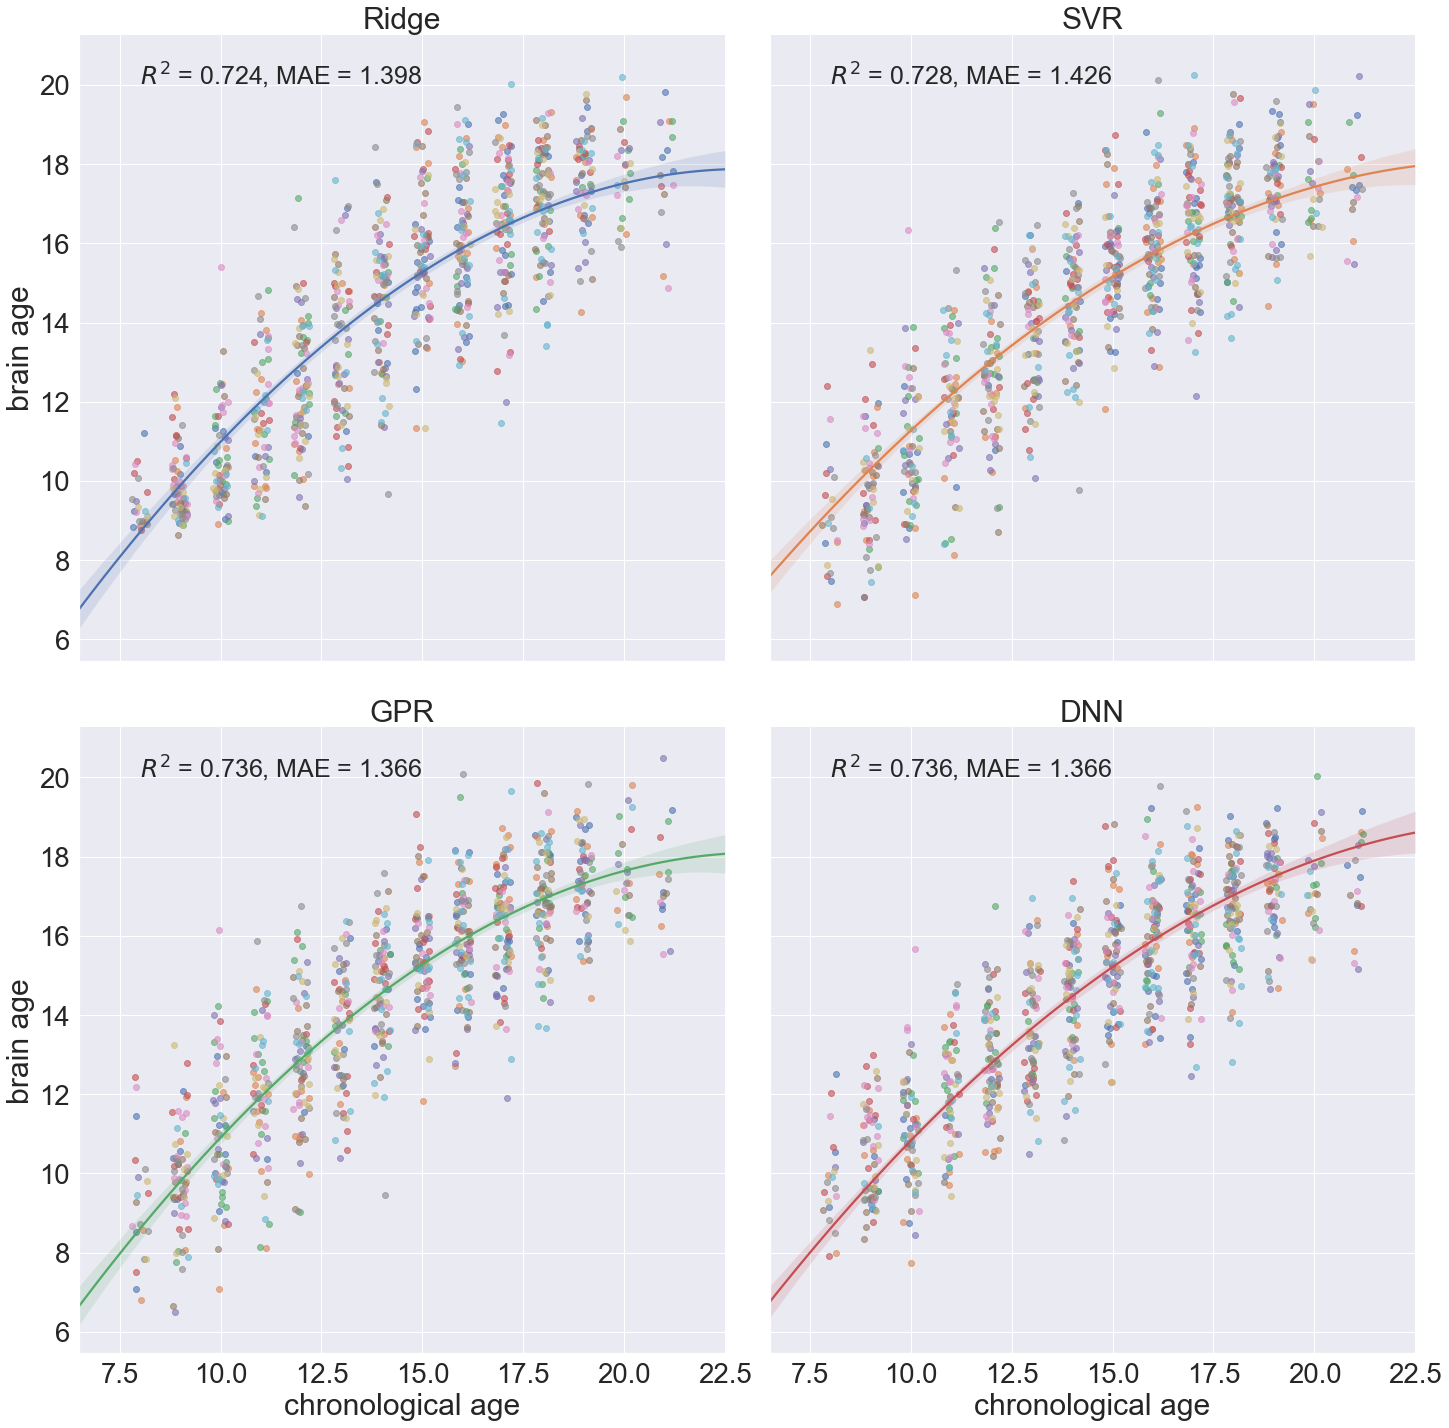

In [43]:
# plot regression for all samples:
plot_brain_age(result_table, scatter_data)

In [63]:
def plot_age_gap(result_table_summary, plot_data):
    
    index_name = plot_data.index.unique(level = 0)
    plot_data = plot_data.sort_index()
    result_table_summary = result_table_summary.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)
    
    g = sns.lmplot(x='chronological age', y='age gap', hue = 'CV', col = 'Method',\
                       data = plot_data2, fit_reg=False, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = False, col_wrap=2)
    g.axes[0].set_xlim(6.5, 22.5)
    
    for i_index in index_name:
        # chronological age vs brain age:
        corr = np.corrcoef(plot_data.loc[(i_index), 'age gap'].values, 
                           plot_data.loc[(i_index), 'chronological age'].values)
        label1 = "r = %.3f" % corr[0,1]

        
        sns.regplot(x='chronological age', y='age gap', \
                    data = plot_data.loc[i_index], scatter=False, ax=g.axes[sub_plot], order = 1)

        #text_y = plot_data['age gap'].max()+.2
        g.axes[sub_plot].text(18, 6, label1, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)


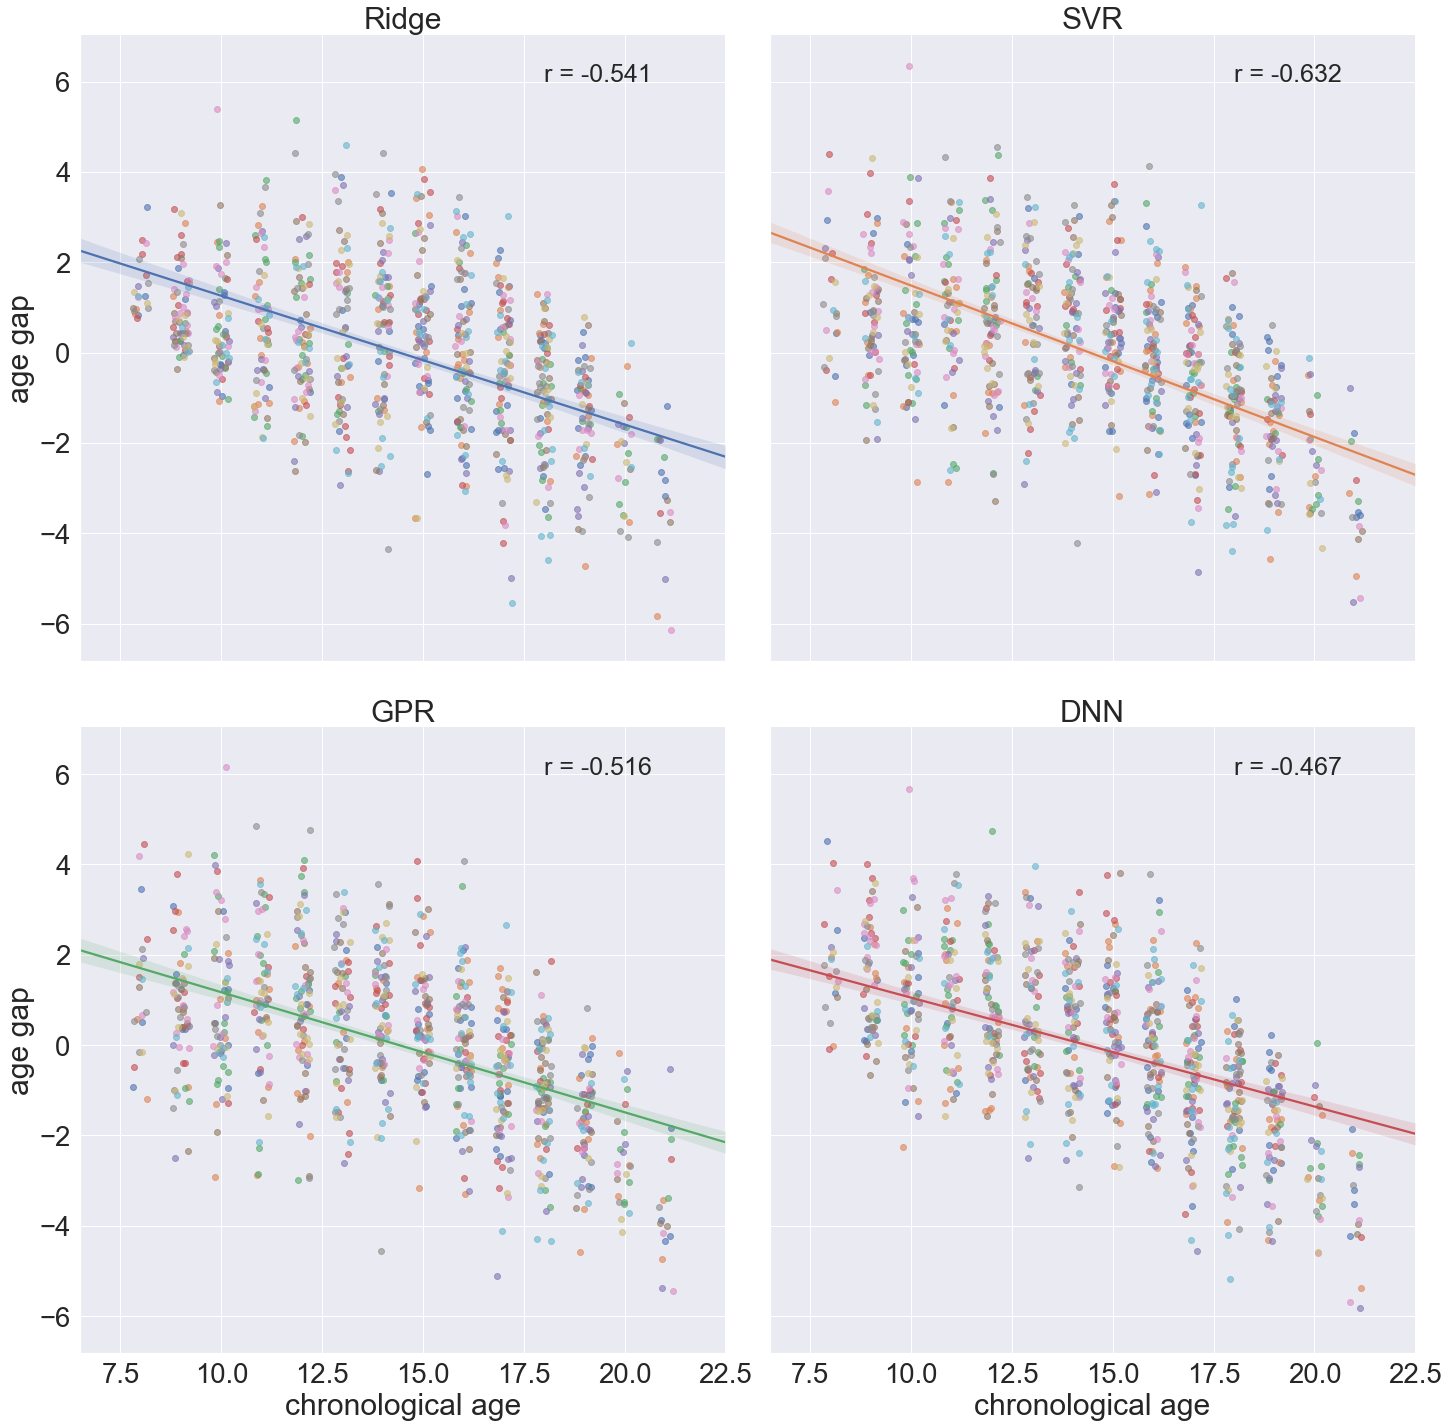

In [64]:
plot_age_gap(result_table, scatter_data)

In [166]:
def plot_all(result_table_summary, plot_data):
    
    method_name = plot_data['Method'].unique()
    variable_name = plot_data['variable'].unique()
    
    result_table_summary = result_table_summary.sort_index()
    
    
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)
    
    g = sns.lmplot(x='chronological age', y='value', hue = 'CV', col = 'Method', row = 'variable', row_order = ['brain age','age gap'], \
                       data = plot_data, fit_reg=False, sharex = True, sharey = False,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = False)
    g.axes[0,0].set_xlim(6.5, 23.5)
    
    sub_plot = 0
    for i_method in method_name:
        g.axes[0,sub_plot].set_ylim(5.5, 21.5)
        # chronological age vs brain age:
        label1 = "$R^2$ = %.3f, MAE = %.3f" % \
        (result_table_summary.loc[(i_method, 'R square')]['mean'], \
         result_table_summary.loc[(i_method, 'MAE')]['mean'])

        i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & (plot_data['variable']=='brain age'),:]
        sns.regplot(x='chronological age', y='value', \
                    data = i_plot_data, scatter=False, ax=g.axes[0, sub_plot], order = 2)

        #text_y = plot_data['brain age'].max()
        g.axes[0, sub_plot].text(8, 20, label1, fontsize = 25)
        
        g.axes[0, sub_plot].set_title(i_method)
        g.axes[0, sub_plot].set_xlabel('')
        
        if sub_plot == 0:
            g.axes[0, sub_plot].set_ylabel('brain age')
        else:
            g.axes[0, sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
    
    sub_plot = 0
    for i_method in method_name:
        g.axes[1,sub_plot].set_ylim(-6.5, 7)
        i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & (plot_data['variable']=='age gap'),:]
        # chronological age vs brain age:
        corr = np.corrcoef(i_plot_data['value'].values, 
                           i_plot_data['chronological age'].values)
        label1 = "r = %.3f" % corr[0,1]

        sns.regplot(x='chronological age', y='value', \
                    data = i_plot_data, scatter=False, ax=g.axes[1, sub_plot], order = 1)

        #text_y = plot_data['age gap'].max()+.2
        g.axes[1, sub_plot].text(18, 6, label1, fontsize = 25)
        g.axes[1, sub_plot].set_title('')
        
        if sub_plot == 0:
            g.axes[1, sub_plot].set_ylabel('age gap')
        else:
            g.axes[1, sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

In [167]:

scatter_data2 = scatter_data.reset_index()
scatter_data2.rename(columns = {'level_0': 'Method'}, inplace = True)



In [168]:
scatter_data_melt = pd.melt(scatter_data2, id_vars = ['Method', 'CV', 'chronological age'], 
                            value_vars = ['age gap', 'brain age'])

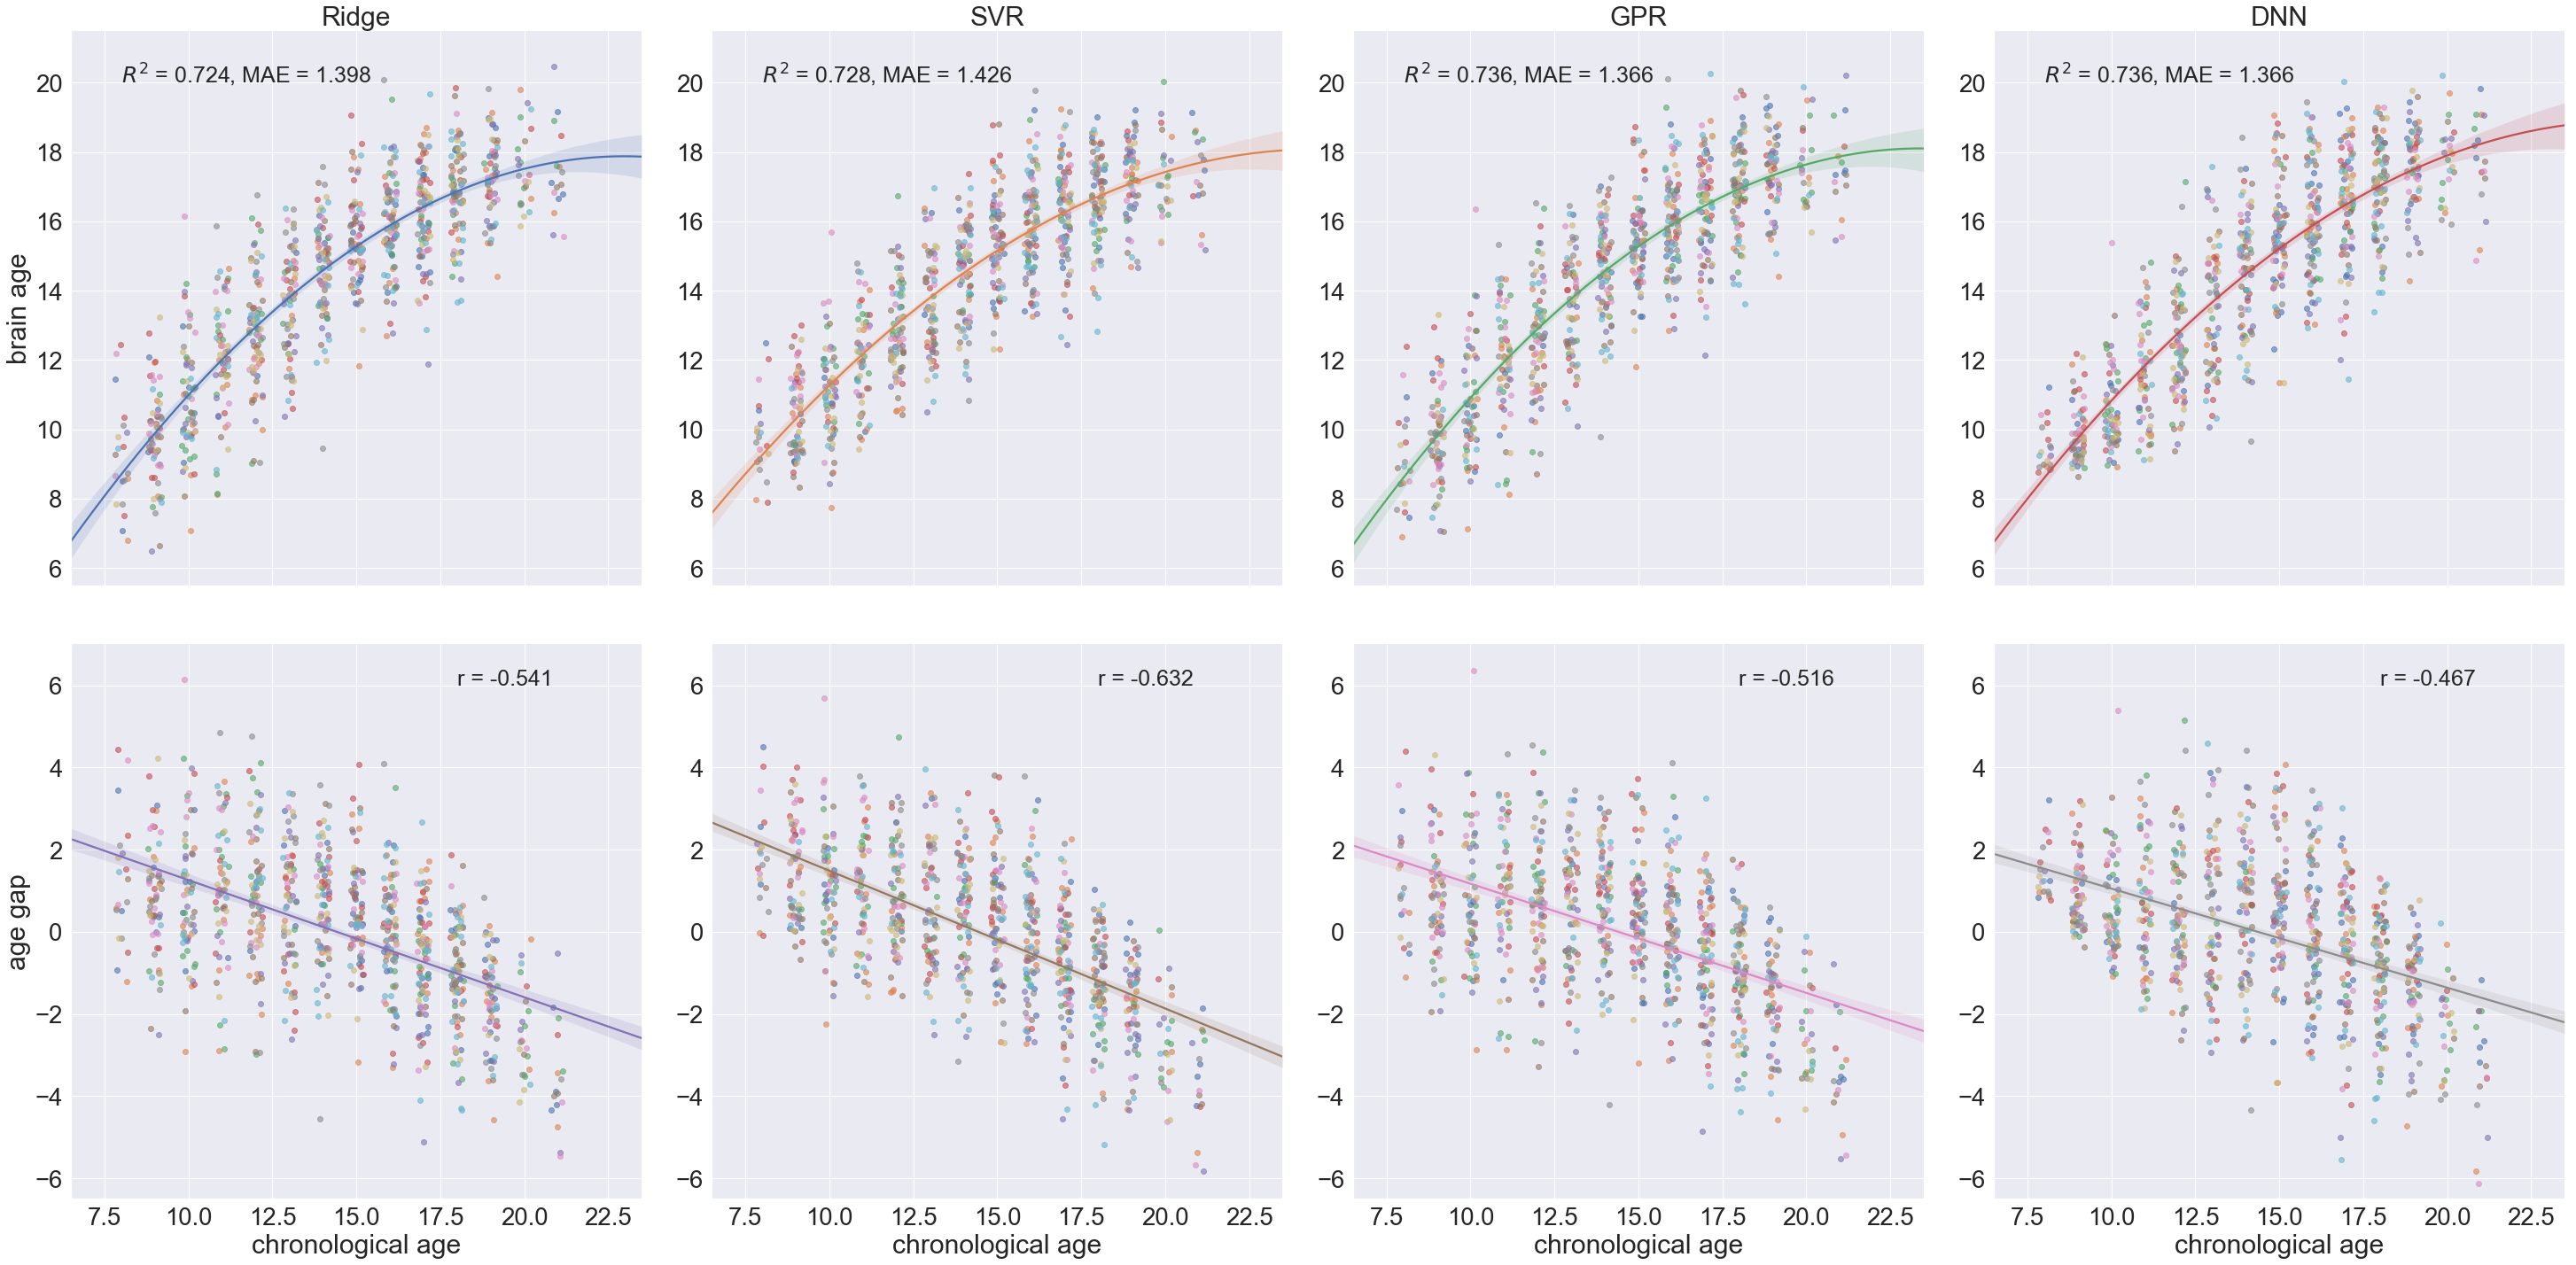

In [169]:
plot_all(result_table, scatter_data_melt)

In [ ]:
# add gender to scatter_data so that we can make scatter plot for female and male separately:
subject_behav = pd.read_csv("data/pnc_cognitive_response.csv", delimiter = ",")
subject_behav = subject_behav.loc[:, ['SUBJID', 'Sex']]

scatter_data2 = scatter_data.reset_index()
scatter_data_gender = scatter_data2.merge(subject_behav, left_on = 'SUBJID', right_on = 'SUBJID')
scatter_data_gender.set_index(['level_0', 'feature'], inplace = True)

In [10]:
from my_fun import qudratic_r_squared

def plot_result_gender(result_table_summary, plot_data):

    index_name = plot_data.index.unique(level = 0)
    
    plot_data = plot_data.sort_index()
    result_table_summary = result_table_summary.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)

    g = sns.lmplot(x='chronological age', y='brain age', hue = 'Sex', col = 'Method', \
                       data = plot_data2, fit_reg=True, order = 2, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = True, col_wrap=2)
    
    g.axes[0].set_xlim(6.5, 22.5)
    g.axes[0].set_ylim(5.5, 22.5)
    
    for i_index in index_name:
        plot_data_i = plot_data.loc[i_index]
        chro_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','chronological age'].values
        chro_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','chronological age'].values
        
        brain_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','brain age'].values
        brain_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','brain age'].values
        
        
        # chronological age vs age gap:
        label2 = "Male: $R^2$ = %.3f, MAE = %.3f" % \
        (qudratic_r_squared(chro_age_m, brain_age_m),\
         np.mean(np.abs(chro_age_m - brain_age_m)))
        
        label1 = "Female: $R^2$ = %.3f, MAE = %.3f" % \
        (qudratic_r_squared(chro_age_f, brain_age_f),\
         np.mean(np.abs(chro_age_f - brain_age_f)))


        #text_y = plot_data['brain age'].max()+.2
        g.axes[sub_plot].text(8, 20.5, label1, fontsize = 25)
        g.axes[sub_plot].text(8, 21.4, label2, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

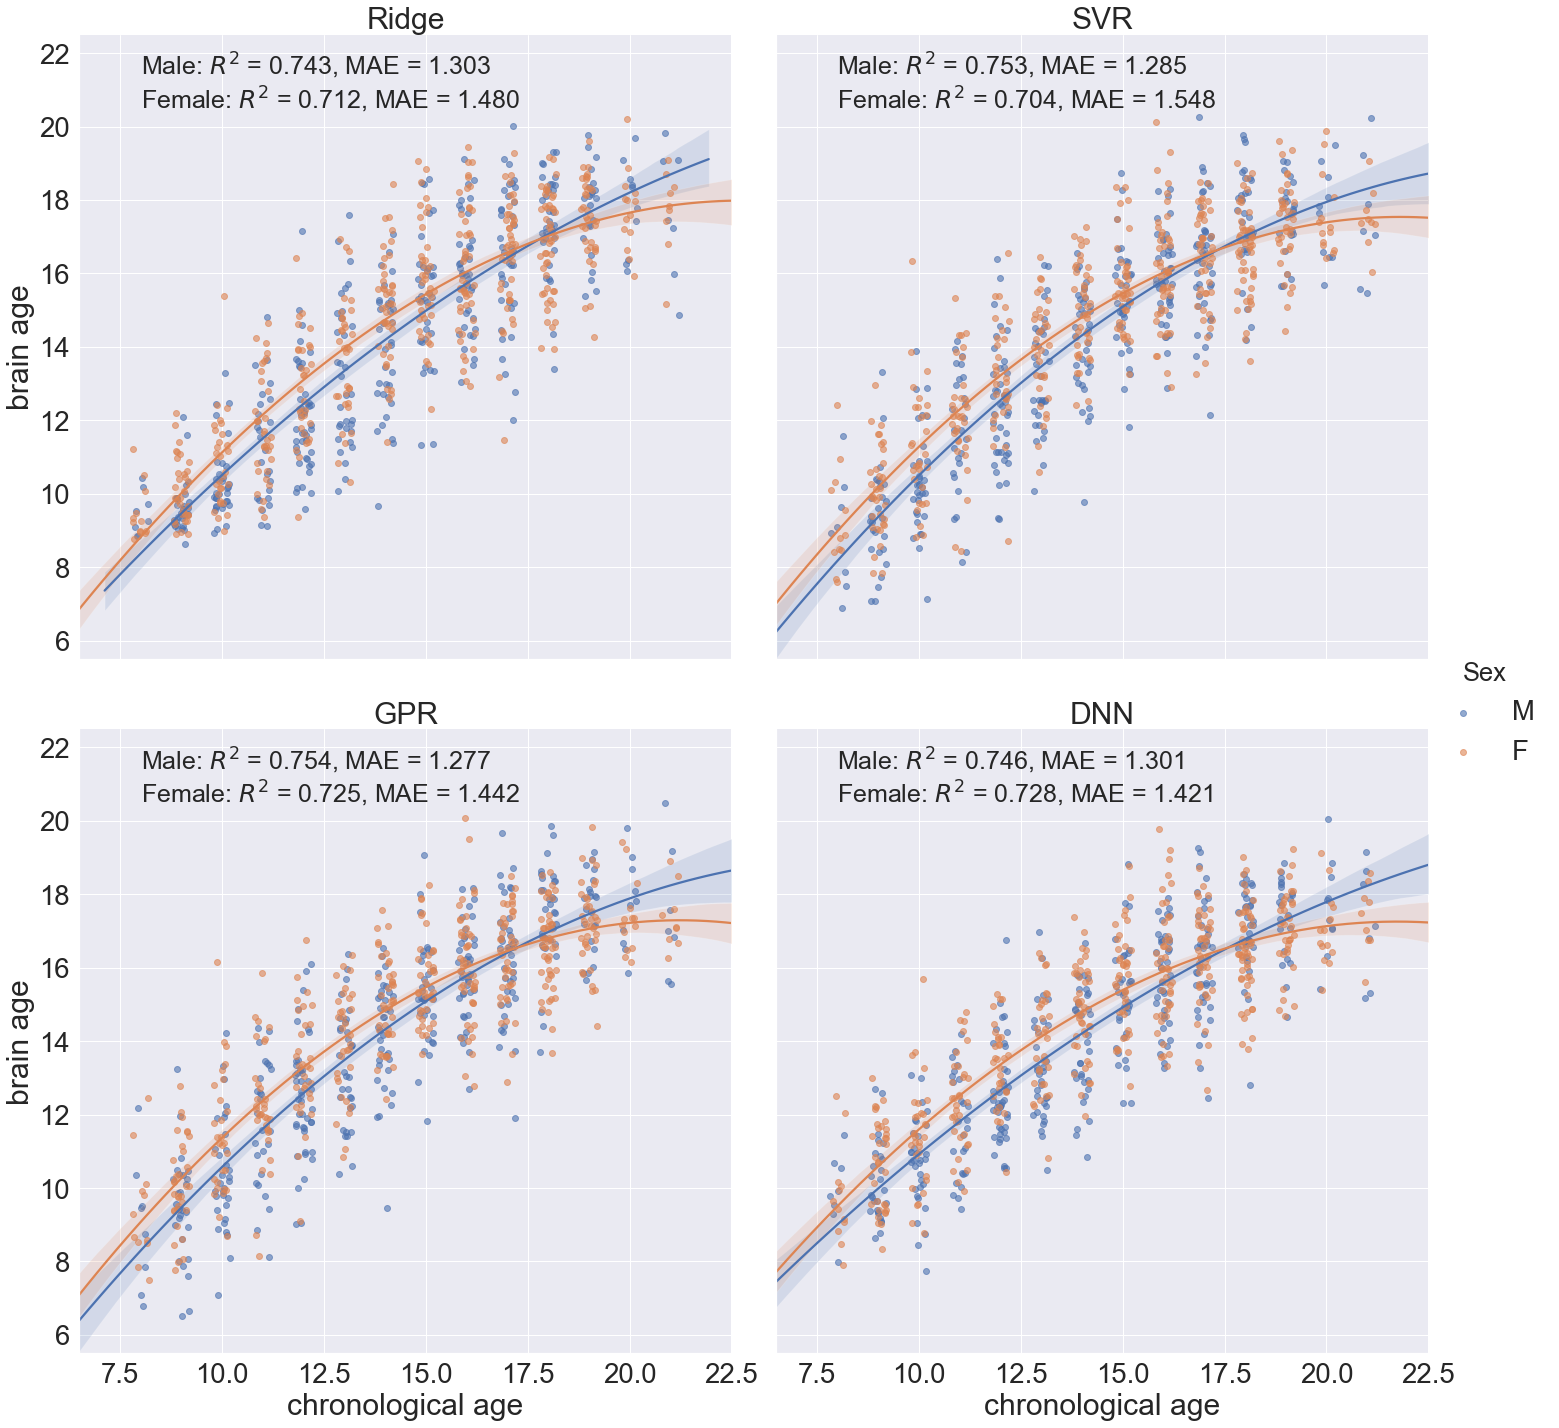

In [11]:
plot_result_gender(result_table, scatter_data_gender)

In [12]:
def plot_age_gap_gender(result_table_summary, plot_data):

    index_name = plot_data.index.unique(level = 0)
    
    plot_data = plot_data.sort_index()
    result_table_summary = result_table_summary.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)

    g = sns.lmplot(x='chronological age', y='age gap', hue = 'Sex', col = 'Method', \
                       data = plot_data2, fit_reg=True, order = 2, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = True, col_wrap=2)
    
    g.axes[0].set_xlim(6.5, 22.5)
    g.axes[0].set_ylim(-6.5, 6.5)
    
    for i_index in index_name:
        plot_data_i = plot_data.loc[i_index]
        chro_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','chronological age'].values
        chro_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','chronological age'].values
        
        brain_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','brain age'].values
        brain_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','brain age'].values
        
        corr_m = np.corrcoef(brain_age_m, brain_age_m-chro_age_m)[0,1]
        corr_f = np.corrcoef(brain_age_f, brain_age_f-chro_age_f)[0,1]
        # chronological age vs brain age:
        label2 = "Male: r = %.3f" % corr_m
        label1 = "Female: r = %.3f" % corr_f


        #text_y = plot_data['brain age'].max()+.2
        g.axes[sub_plot].text(16, 5, label1, fontsize = 25)
        g.axes[sub_plot].text(16, 5.5, label2, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

C:\Users\Xin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


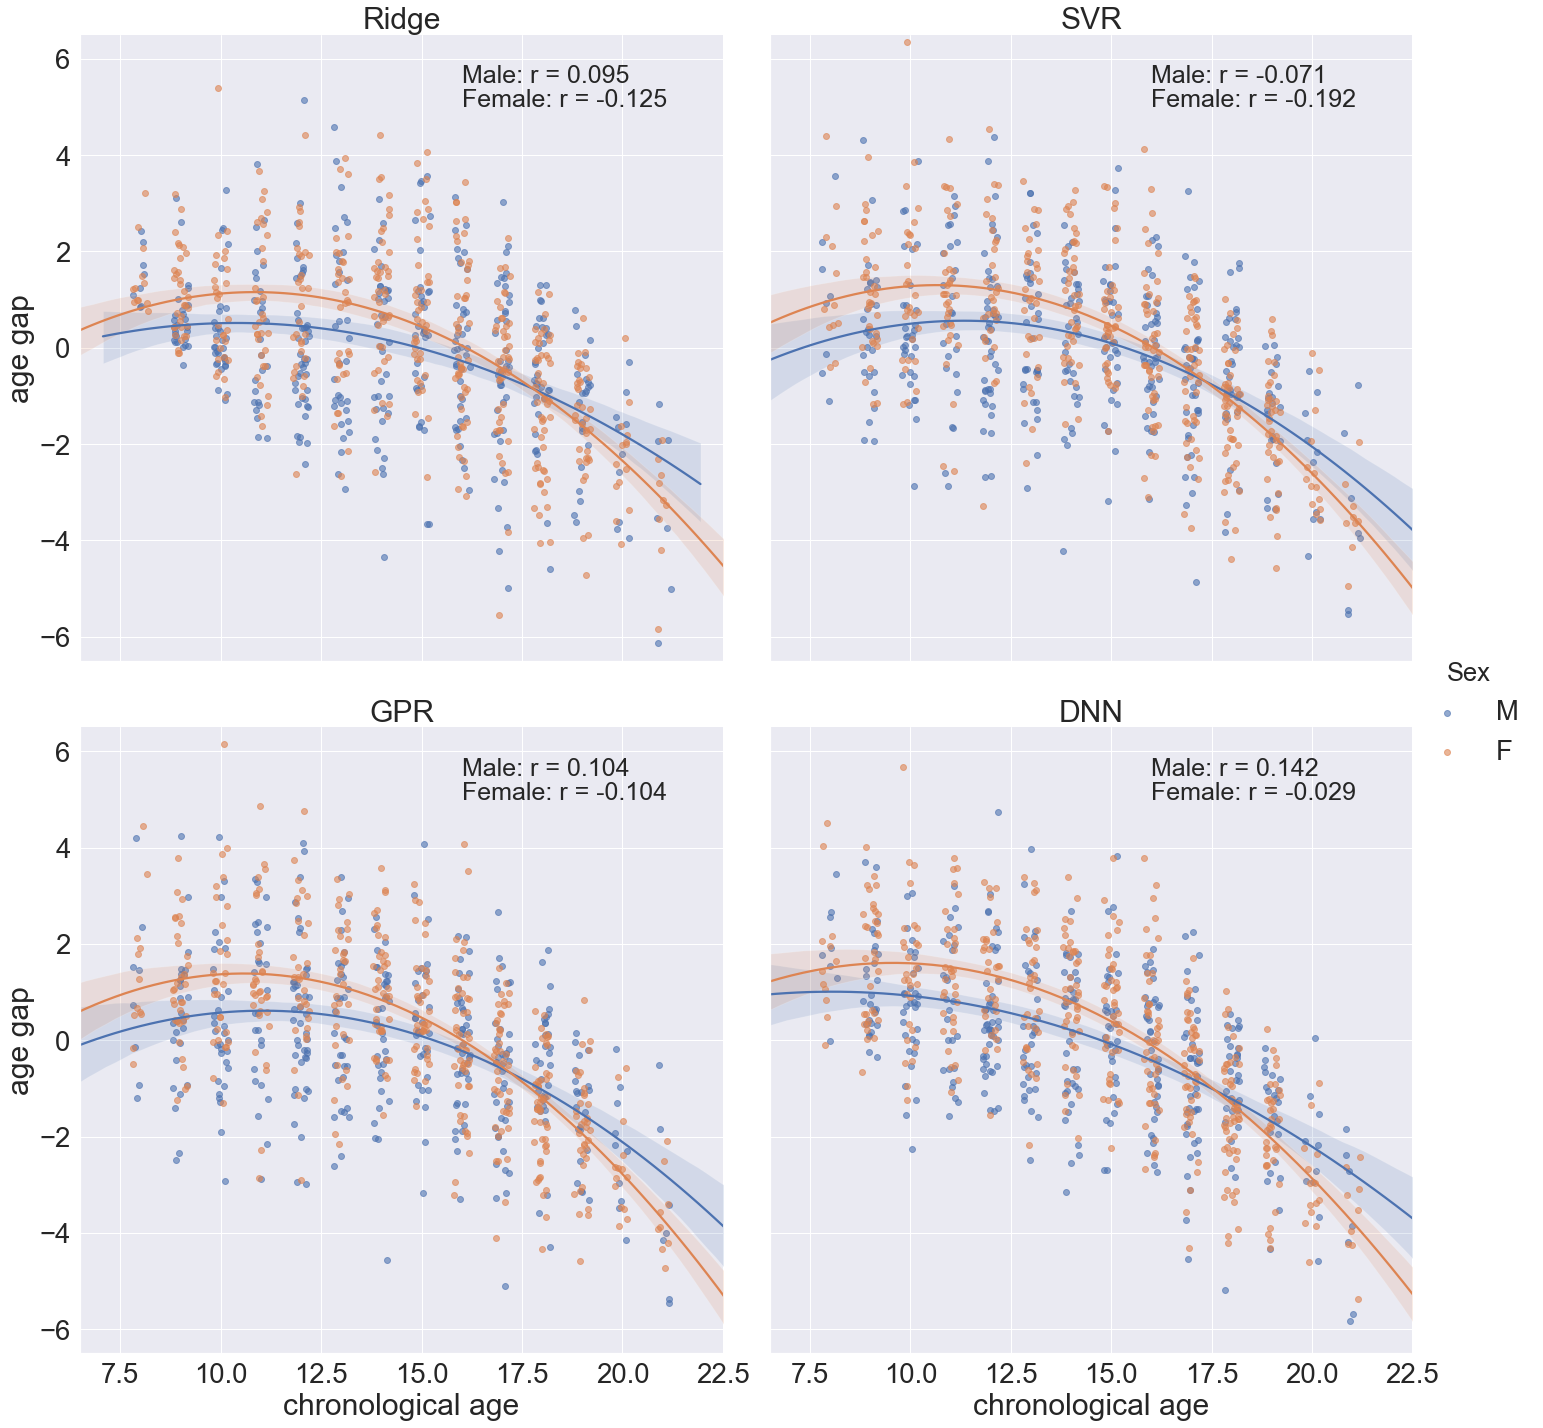

In [13]:
plot_age_gap_gender(result_table, scatter_data_gender)